**Muhammad Sufyan Siddiqui**
**18K-1161**
**AI-A3**
**Rule #4**
**Options: 1,2,8**

In [49]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import seaborn as sns
import random as rd


In [50]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv('iris.data',names=names)
df.head()


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


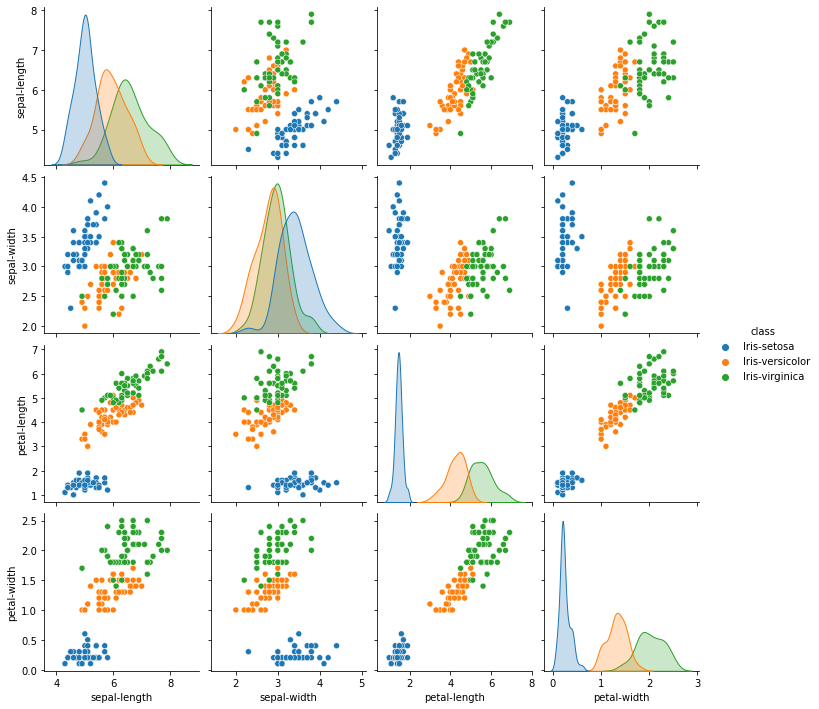

In [51]:
sns.pairplot(data=df, hue = 'class')

In [52]:
X = df.values[:,0:4]
Y = df.values[:,4]

#Training and testing splitting
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3)


In [53]:
def GiniTree(x_train, y_train,split,rand):
    if split is None and rand is None:
        gini_tree = DecisionTreeClassifier(criterion='gini')
    elif split is not None and rand is None :
        gini_tree = DecisionTreeClassifier(criterion='gini',splitter=split)
    elif split is not None and rand is not None:
        gini_tree = DecisionTreeClassifier(criterion='gini',splitter=split,random_state = rand)
    elif split is None and rand is not None:
        gini_tree = DecisionTreeClassifier(criterion='gini',random_state=rand)
    


    gini_tree.fit(x_train,y_train)
    return gini_tree
def EntropyTree(x_train,y_train):
    ent_tree = DecisionTreeClassifier(criterion='entropy')
    ent_tree.fit(x_train,y_train)
    return ent_tree
def Prediction(x_test,tree):
    y_pred = tree.predict(x_test)
    return y_pred
def cal_accuracy(y_test, y_pred):
	
	print("Confusion Matrix: ",
		confusion_matrix(y_test, y_pred))
	
	print ("Accuracy : ",
	accuracy_score(y_test,y_pred)*100)
	
	print("Report : ",
	classification_report(y_test, y_pred))
def PrintTree(tree,classes,cols):
        d_tree = plot_tree(tree,feature_names = cols,class_names = classes,filled=True,rounded=True)




    


**Option 1**

Tree with Gini Index as a Criterion
Confusion Matrix:  [[15  0  0]
 [ 0 13  1]
 [ 0  1 15]]
Accuracy :  95.55555555555556
Report :                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



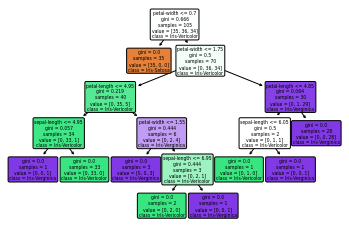

In [54]:
cols = df.columns
classes = ['Iris-Setosa','Iris-Vericolor','Iris-Verginica']
g_tree = GiniTree(x_train,y_train,split=None,rand = None)
e_tree = EntropyTree(x_train,y_train)
y_pred1 = Prediction(x_test,g_tree)
y_pred2 = Prediction(x_test,e_tree)
print("Tree with Gini Index as a Criterion")
PrintTree(g_tree,classes,cols)
cal_accuracy(y_test,y_pred1)





Tree with Entropy as a Criterion
Confusion Matrix:  [[15  0  0]
 [ 0 14  0]
 [ 0  0 16]]
Accuracy :  100.0
Report :                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



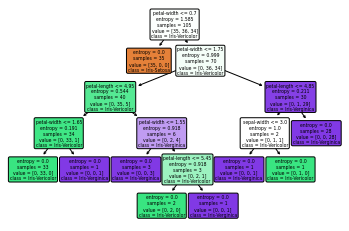

In [55]:
print("Tree with Entropy as a Criterion")
PrintTree(e_tree,classes,cols)
cal_accuracy(y_test,y_pred2)

**Option 2**

Tree with splitter:  best
Confusion Matrix:  [[15  0  0]
 [ 0 13  1]
 [ 0  0 16]]
Accuracy :  97.77777777777777
Report :                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



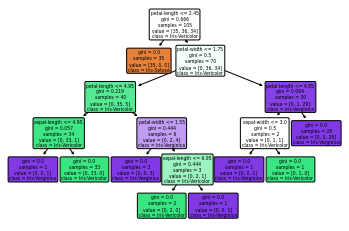

In [56]:
split = ['best','random']
trees=[]
for i in split:
    g_tree = GiniTree(x_train,y_train,i,rand=None)
    trees.append(g_tree)

print("Tree with splitter: ",split[0])
y_pred1 = Prediction(x_test,trees[0])
cal_accuracy(y_test,y_pred1)
PrintTree(trees[0],classes=classes,cols=cols)



Tree with splitter:  random
Confusion Matrix:  [[14  1  0]
 [ 0 14  0]
 [ 0  0 16]]
Accuracy :  97.77777777777777
Report :                   precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



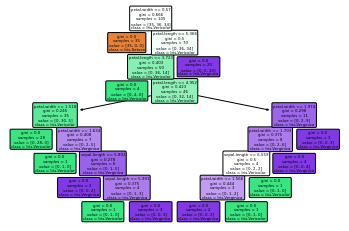

In [57]:
print("Tree with splitter: ",split[1])
y_pred1 = Prediction(x_test,trees[1])
cal_accuracy(y_test,y_pred1)
PrintTree(trees[1],classes=classes,cols=cols)


**Option 3**

In [58]:
rd.seed(50)
random_trees=[]
for i in range(10):
    r = rd.randint(0,50)
    g_tree = GiniTree(x_train,y_train,split='random',rand=r)
    y_pred1 = Prediction(x_test,g_tree)
    accuracy = accuracy_score(y_test,y_pred1)*100
    print("Random State:",r," Accuracy:",accuracy)
    t=(accuracy,r)
    random_trees.append(t)
a,r = max(random_trees)
print("( Max accuracy with random state:"+str((a,r)))

Random State: 31  Accuracy: 97.77777777777777
Random State: 17  Accuracy: 95.55555555555556
Random State: 23  Accuracy: 95.55555555555556
Random State: 40  Accuracy: 97.77777777777777
Random State: 15  Accuracy: 100.0
Random State: 44  Accuracy: 97.77777777777777
Random State: 30  Accuracy: 95.55555555555556
Random State: 49  Accuracy: 93.33333333333333
Random State: 21  Accuracy: 100.0
Random State: 5  Accuracy: 95.55555555555556
( Max accuracy with random state:(100.0, 21)


Confusion Matrix:  [[15  0  0]
 [ 0 14  0]
 [ 0  0 16]]
Accuracy :  100.0
Report :                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



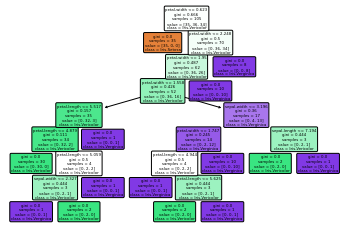

In [59]:
g_tree=GiniTree(x_train,y_train,split='random',rand=r)
y_pred1 = Prediction(x_test,g_tree)
cal_accuracy(y_test,y_pred1)
PrintTree(g_tree,classes,cols)

**Difference**

Tree with gini index as criterion is working better than the tree with entropy as the criterion. This is due to the nature of the dataset. Furthermore, when used splitter functionality, the random splitting won't do much of a difference unless it is used with a random integer for randomState of the data points. In this case, 10 different random integers were used iteratively and their accuracy scores were calculated. 

**Best Possible Tree**

The iterative run for differen randomStates gave us that at randomState 30, the accuracy of our decision tree is maximum. The tree picks the random instances according to the randomState parameter.

Speaking of the structure of the tree, the tree we selected was dense yet large as compared to others giving us the best possible accuracy so far. The visualisation of that tree is given below.


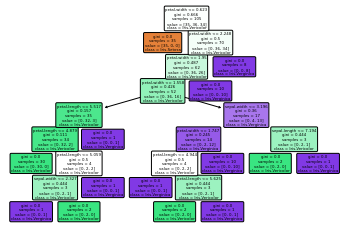

In [60]:
PrintTree(g_tree,classes,cols)